In [1]:
# Description: This program uses the Bollinger Band strategy to determine when buy and sell stock

In [2]:
# Import the libraries
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [3]:
# Load the data
ticker = 'TCSG.ME'
start_date = '2020-06-06'
data = yf.download(ticker, start_date)
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-09-30,10.000000,11.410000,9.110000,9.500000,9.500000,338584400
2020-10-01,9.690000,10.100000,9.230000,9.460000,9.460000,124297600
2020-10-02,9.060000,9.280000,8.940000,9.200000,9.200000,55018300
2020-10-05,9.430000,9.490000,8.920000,9.030000,9.030000,36316900
2020-10-06,9.040000,10.180000,8.900000,9.900000,9.900000,90864000
...,...,...,...,...,...,...
2021-05-10,19.280001,19.299999,18.180000,18.469999,18.469999,104670500
2021-05-11,17.200001,20.299999,17.055000,20.209999,20.209999,203230500
2021-05-12,20.000000,20.000000,18.510000,18.889999,18.889999,128281500


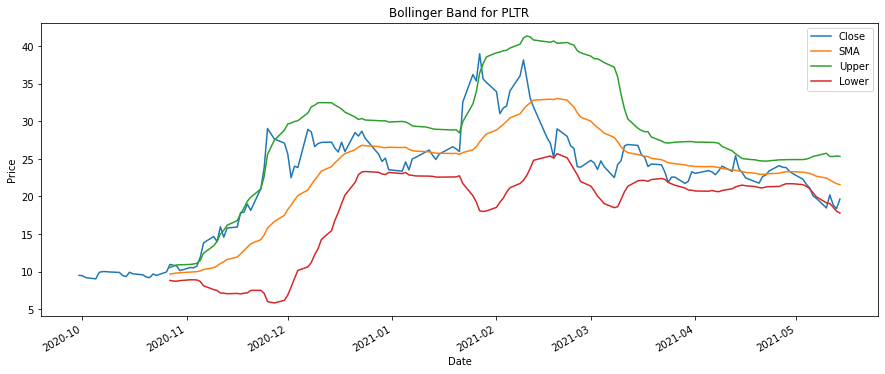

In [4]:
# Calculate the simple moving average, standart deviaton, upper band and the lower band
# Get the time period (20 day)
period = 20
# Calculate th Simple Moving Average (SMA)
data['SMA'] = data['Close'].rolling(window=period).mean()
# Get the standard deviation
data['STD'] = data['Close'].rolling(window=period).std()
# Calculate the upper Bollinger band
data['Upper'] = data['SMA'] + (data['STD'] * 2)
# Calculate the lower Bollinger band
data['Lower'] = data['SMA'] - (data['STD'] * 2)

# Create a list of columns to keep
column_list = ['Close', 'SMA', 'Upper', 'Lower']
# Plot the data
data[column_list].plot(figsize=(15, 6))
plt.title('Bollinger Band for {}'.format(ticker))
plt.ylabel('Price')
plt.show()

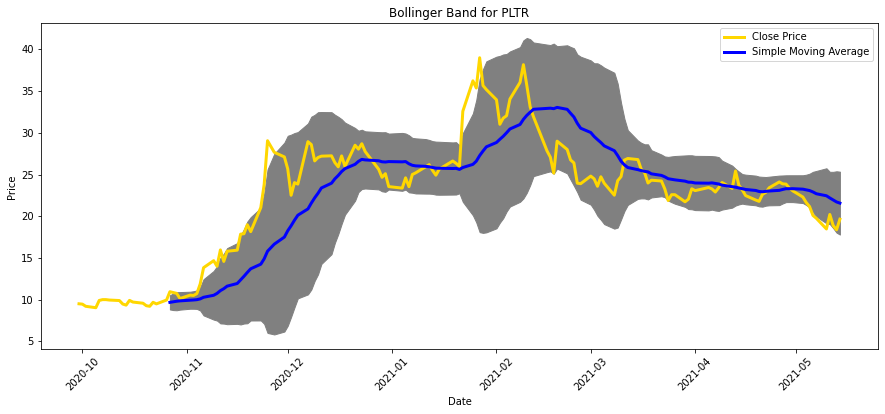

In [5]:
# Plot and shade the area between the two Bollinger bands
# Get the figure and the figure size
fig = plt.figure(figsize=(15, 6))
# Add the subplot
ax = fig.add_subplot(1,1,1)
# Get the index values of the data frame
x_axis = data.index
# Plot and shade the area between the upper and lower bands grey
ax.fill_between(x_axis, data['Upper'], data['Lower'], color='grey')
# Plot the closing price and the moving average 
ax.plot(x_axis, data['Close'], color='gold', lw=3, label='Close Price')
ax.plot(x_axis, data['SMA'], color='blue', lw=3, label='Simple Moving Average')
# Set the title and show the image
ax.set_title('Bollinger Band for {}'.format(ticker))
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.xticks(rotation=45)
ax.legend()
plt.show()

In [6]:
# Create a new data frame
new_data = data[period-1:].copy()
# Show the data
new_data

,Open,High,Low,Close,Adj Close,Volume,SMA,STD,Upper,Lower
Date,,,,,,,,,,
2020-10-27,10.000000,11.040000,9.920000,10.950000,10.950000,53695900,9.67350,0.426062,10.525625,8.821375
2020-10-28,10.660000,10.985000,10.100000,10.850000,10.850000,30941700,9.74100,0.497995,10.736990,8.745010
2020-10-29,10.900000,11.100000,10.560000,10.750000,10.750000,20515700,9.80550,0.541338,10.888177,8.722823
2020-10-30,10.610000,10.680000,9.850000,10.130000,10.130000,19705500,9.85200,0.526324,10.904648,8.799352
2020-11-02,10.230000,10.570000,10.230000,10.540000,10.540000,11677800,9.92750,0.510262,10.948024,8.906976
...,...,...,...,...,...,...,...,...,...,...
2021-05-10,19.280001,19.299999,18.180000,18.469999,18.469999,104670500,22.45050,1.650016,25.750532,19.150468
2021-05-11,17.200001,20.299999,17.055000,20.209999,20.209999,203230500,22.19000,1.565638,25.321276,19.058724
2021-05-12,20.000000,20.000000,18.510000,18.889999,18.889999,128281500,21.94950,1.686265,25.322030,18.576970


In [7]:
# Create a function to get the buy and sell signals
def buy_sell_bollinger_bands(data):
    
    buy = []
    sell = []
    
    for i in range(len(data['Close'])):
        if data['Close'][i] > data['Upper'][i]: # Then you should sell
            buy.append(np.nan)
            sell.append(data['Close'][i])
        elif data['Close'][i] < data['Lower'][i]: # Then you should buy
            buy.append(data['Close'][i])
            sell.append(np.nan)
        else:
            buy.append(np.nan)
            sell.append(np.nan)
            
    return (buy, sell)

In [8]:
# Create two new columns
new_data['Buy'] = buy_sell_bollinger_bands(new_data)[0]
new_data['Sell'] = buy_sell_bollinger_bands(new_data)[1]
new_data

,Open,High,Low,Close,Adj Close,Volume,SMA,STD,Upper,Lower,Buy,Sell
Date,,,,,,,,,,,,
2020-10-27,10.000000,11.040000,9.920000,10.950000,10.950000,53695900,9.67350,0.426062,10.525625,8.821375,NaN,10.95
2020-10-28,10.660000,10.985000,10.100000,10.850000,10.850000,30941700,9.74100,0.497995,10.736990,8.745010,NaN,10.85
2020-10-29,10.900000,11.100000,10.560000,10.750000,10.750000,20515700,9.80550,0.541338,10.888177,8.722823,NaN,NaN
2020-10-30,10.610000,10.680000,9.850000,10.130000,10.130000,19705500,9.85200,0.526324,10.904648,8.799352,NaN,NaN
2020-11-02,10.230000,10.570000,10.230000,10.540000,10.540000,11677800,9.92750,0.510262,10.948024,8.906976,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-10,19.280001,19.299999,18.180000,18.469999,18.469999,104670500,22.45050,1.650016,25.750532,19.150468,18.469999,NaN
2021-05-11,17.200001,20.299999,17.055000,20.209999,20.209999,203230500,22.19000,1.565638,25.321276,19.058724,NaN,NaN
2021-05-12,20.000000,20.000000,18.510000,18.889999,18.889999,128281500,21.94950,1.686265,25.322030,18.576970,NaN,NaN


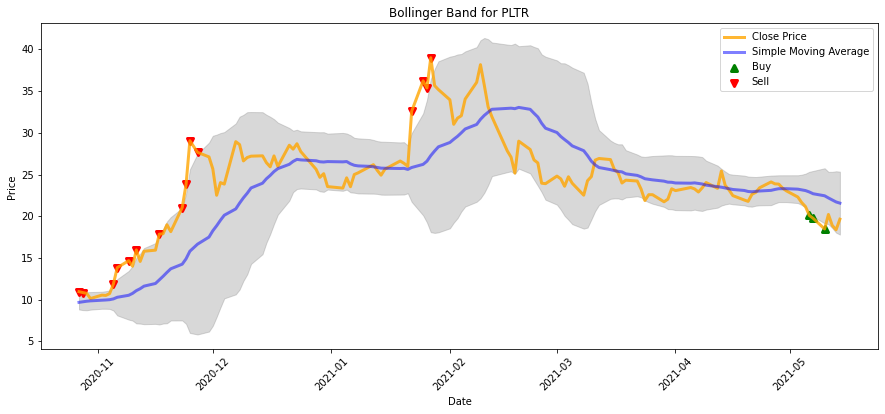

In [9]:
# Plot all of the data
# Get the figure and the figure size
fig = plt.figure(figsize=(15, 6))
# Add the subplot
ax = fig.add_subplot(1,1,1)
# Get the index values of the data frame
x_axis = new_data.index
# Plot and shade the area between the upper and lower bands grey
ax.fill_between(x_axis, new_data['Upper'], new_data['Lower'], color='grey', alpha=0.3)
# Plot the closing price and the moving average 
ax.plot(x_axis, new_data['Close'], color='orange', lw=3, label='Close Price', alpha=0.8)
ax.plot(x_axis, new_data['SMA'], color='blue', lw=3, label='Simple Moving Average', alpha=0.5)
ax.scatter(x_axis, new_data['Buy'], color='green', lw=3, label='Buy', marker='^', alpha=1)
ax.scatter(x_axis, new_data['Sell'], color='red', lw=3, label='Sell', marker='v', alpha=1)
# Set the title and show the image
ax.set_title('Bollinger Band for {}'.format(ticker))
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.xticks(rotation=45)
ax.legend()
plt.show()